In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
import scipy.linalg as la

In [62]:
# Part a
# Discretize our domain
DOMAIN = np.linspace(1,2,500)

# Get our overdetermined A matrix
A = np.vstack((np.exp(DOMAIN), np.sin(DOMAIN), gamma(DOMAIN), np.ones(len(DOMAIN)))).T
# Get our b vector
b = np.array([1/(x) for x in DOMAIN])

# Solve for our coeffs of best fit
coeffs_ = la.lstsq(A,b)[0]

# Display results
for c, l in zip(coeffs_,['e^x', 'sin(x)', 'gamma(x)', 'constant']):
    print("Function: {} with coeffecient {}".format(l,c))
    
approx = lambda x: np.dot(np.array([np.exp(x), np.sin(x), gamma(x), 1]), coeffs_)

Function: e^x with coeffecient -0.10502512106936046
Function: sin(x) with coeffecient -0.13909155712848742
Function: gamma(x) with coeffecient 1.1117332023528421
Function: constant with coeffecient 0.2908823123014282


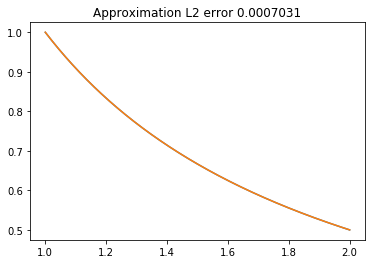

In [63]:
plt.title("Approximation L2 error {}".format(round(la.norm(b-np.array([approx(x) for x in DOMAIN]), ord=2),8)))
plt.plot(DOMAIN, b)
plt.plot(DOMAIN, [approx(x) for x in DOMAIN])

In [68]:
a = [approx(x) for x in DOMAIN]

for i in range(10):
    indx_ = np.random.choice(len(DOMAIN))
    print(a[indx_], b[indx_])

0.5176441722594816 0.5176348547717843
0.9155666888060501 0.9155963302752292
0.5348030164514074 0.534833869239014
0.9881788355639238 0.9881188118811881
0.5113060133331133 0.5112704918032787
0.5359504973424591 0.535982814178303
0.7425814807002649 0.7425595238095238
0.6206512910515741 0.6206467661691543
0.9172506715679468 0.917279411764706
0.5802027558463809 0.5802325581395349


In [78]:
# Part b
# Discretize our domain
DOMAIN = np.linspace(1e-6,1,500)

# Get our overdetermined A matrix
A = np.vstack((np.exp(DOMAIN), np.sin(DOMAIN), gamma(DOMAIN), np.ones(len(DOMAIN)))).T
A[0,2]=1e6
# Get our b vector
b = np.array([1/(x) for x in DOMAIN])

# Solve for our coeffs of best fit
coeffs_ = la.lstsq(A,b)[0]

# Display results
for c, l in zip(coeffs_,['e^x', 'sin(x)', 'gamma(x)', 'constant']):
    print("Function: {} with coeffecient {}".format(l,c))
    
approx = lambda x: np.dot(np.array([np.exp(x), np.sin(x), gamma(x), 1]), coeffs_)

Function: e^x with coeffecient 0.05797301677549551
Function: sin(x) with coeffecient -0.7606537020844569
Function: gamma(x) with coeffecient 0.999999445345629
Function: constant with coeffecient 0.4967174143136241


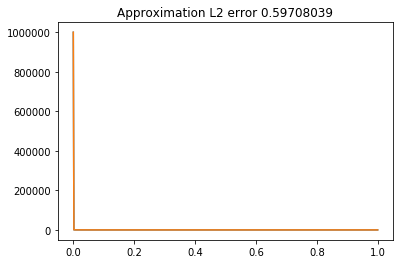

In [79]:
plt.title("Approximation L2 error {}".format(round(la.norm(b-np.array([approx(x) for x in DOMAIN]), ord=2),8)))
plt.plot(DOMAIN, b)
plt.plot(DOMAIN, [approx(x) for x in DOMAIN])